In [1]:
from os.path import join
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = join('datasets', 'roe_cof.csv')

df = pd.read_csv(data, parse_dates=[0], index_col=0, squeeze=True).dropna()

df.head(25)

,ucb_roe,ucb_cof,ucb_nims,asset_yld,loan_gth,ucb_ldr,m3,m3_yy,rrr,policy,fin_pe,fin_pb
2008-03-31,11.08,3.12,4.02,7.37,4.447821,68.276843,3198749.835,6.201531,21.0,5.00,14.692117,1.784067
2008-06-30,10.59,2.99,3.94,7.11,16.208615,71.132062,3299297.124,7.078087,21.0,5.25,12.801276,1.468649
2008-09-30,9.40,3.03,4.04,7.27,14.716742,67.470297,3384609.207,14.742518,21.0,6.00,13.514477,1.603242
2008-12-31,7.17,3.01,4.07,7.23,12.149364,67.577464,3711749.732,10.103800,19.0,5.50,15.569823,1.340741
2009-03-31,7.26,3.03,4.38,7.56,14.135784,66.859585,3585596.694,12.093689,19.0,4.75,15.236230,1.236850
2009-06-30,8.65,2.85,4.41,7.40,6.770386,66.459389,3713719.659,12.560934,19.0,4.25,19.284649,1.592710
2009-09-30,9.99,2.72,4.41,7.24,6.453792,64.662913,3759306.084,11.070610,19.0,4.00,21.240830,1.882077
2009-12-31,11.38,2.37,4.11,6.55,8.652602,66.036291,4077521.552,9.854431,19.0,4.00,20.324328,1.924171
2010-03-31,11.90,2.25,4.21,6.55,2.422627,62.338404,3991470.296,11.319555,19.0,4.00,19.329883,1.911234
2010-06-30,11.77,2.18,4.15,6.40,6.179292,63.730683,4072623.665,9.664273,19.0,4.00,19.397814,2.028665


C:\Users\Derrick\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


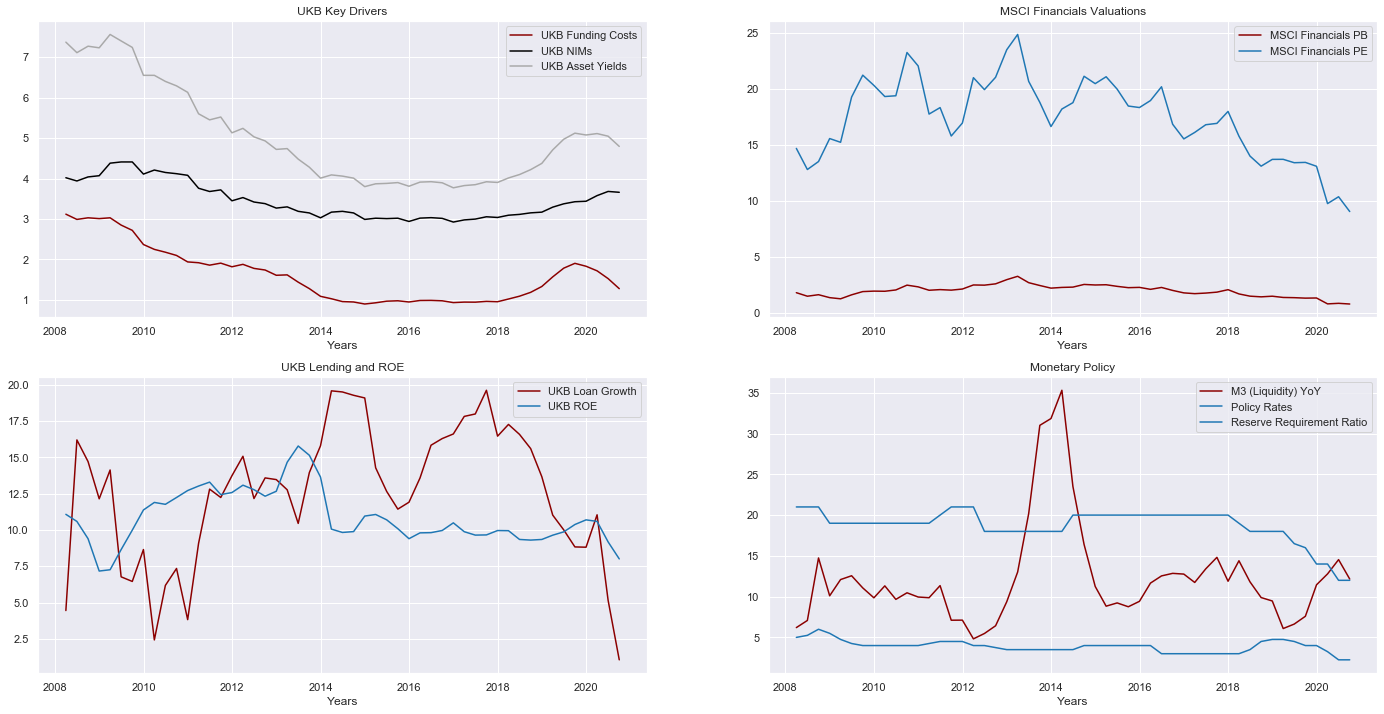

In [3]:
sns.set(style="darkgrid")

def correction_plots(data=df):
    fig = plt.figure(figsize=(24,12))

    plt.subplot(2,2,1)
    plt.plot(data.ucb_cof, color='darkred', label='UKB Funding Costs')
    plt.plot(data.ucb_nims, color='black', label='UKB NIMs')
    plt.plot(data.asset_yld, color='darkgray', label='UKB Asset Yields') #
    plt.title('UKB Key Drivers')
    plt.legend()
    plt.xlabel('Years')

    plt.subplot(2,2,2)
    plt.plot(data.fin_pb, color='darkred', label='MSCI Financials PB')
    plt.plot(data.fin_pe, color='tab:blue', label='MSCI Financials PE')
    plt.title('MSCI Financials Valuations')
    plt.legend()
    plt.xlabel('Years')

    plt.subplot(2, 2, 3)
    plt.plot(data.loan_gth, color='darkred', label='UKB Loan Growth')
    plt.plot(data.ucb_roe, color='tab:blue', label='UKB ROE')
    plt.title('UKB Lending and ROE')
    plt.legend()
    plt.xlabel('Years')

    plt.subplot(2, 2, 4)
    plt.plot(data.m3_yy, color='darkred', label='M3 (Liquidity) YoY')
    plt.plot(data.policy, color='tab:blue', label='Policy Rates')
    plt.plot(data.rrr, color='tab:blue', label='Reserve Requirement Ratio')
    plt.title('Monetary Policy')
    plt.legend()
    plt.xlabel('Years')
    
    plt.show()
correction_plots()

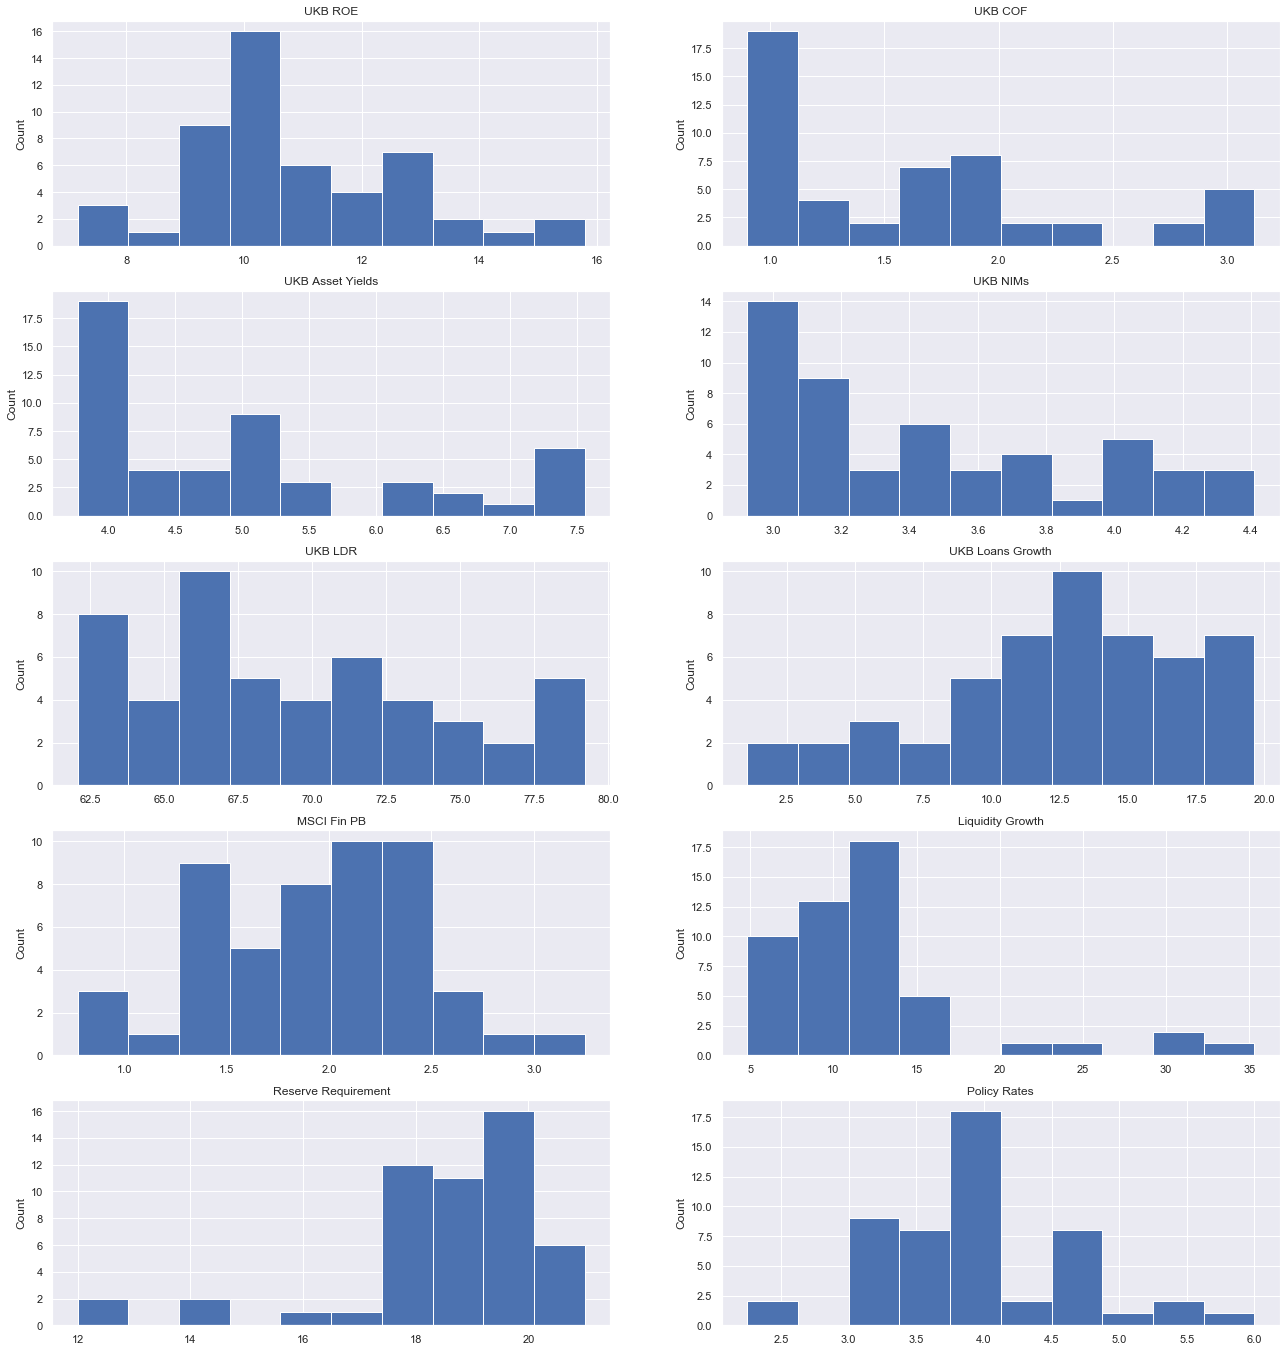

In [4]:
def normal_plots(data=df):
    fig = plt.figure(figsize=(22,24))

    plt.subplot(5,2,1)
    plt.hist(data.ucb_roe)
    plt.title('UKB ROE')
    plt.ylabel('Count')

    plt.subplot(5,2,2)
    plt.hist(data.ucb_cof)
    plt.title('UKB COF')
    plt.ylabel('Count')
    
    plt.subplot(5,2,3)
    plt.hist(data.asset_yld)
    plt.title('UKB Asset Yields')
    plt.ylabel('Count')
    
    plt.subplot(5,2,4)
    plt.hist(data.ucb_nims)
    plt.title('UKB NIMs')
    plt.ylabel('Count')
    
    plt.subplot(5,2,5)
    plt.hist(data.ucb_ldr)
    plt.title('UKB LDR')
    plt.ylabel('Count')
    
    plt.subplot(5,2,6)
    plt.hist(data.loan_gth)
    plt.title('UKB Loans Growth')
    plt.ylabel('Count')
    
    plt.subplot(5,2,7)
    plt.hist(data.fin_pb)
    plt.title('MSCI Fin PB')
    plt.ylabel('Count')
    
    plt.subplot(5,2,8)
    plt.hist(data.m3_yy)
    plt.title('Liquidity Growth')
    plt.ylabel('Count')
    
    plt.subplot(5,2,9)
    plt.hist(data.rrr)
    plt.title('Reserve Requirement')
    plt.ylabel('Count')
    
    plt.subplot(5,2,10)
    plt.hist(data.policy)
    plt.title('Policy Rates')
    plt.ylabel('Count')
    
    plt.show()

normal_plots()

In [5]:
#testing for stationarity

def adf_test(series, name=None, num=None, returns=False):
    result = adfuller(series)
    if returns == True:
        return result
    else:
        if name == None:
            name = str(series.name)
        if num != None:
            name = 'Series %s' % str(num)
        print('\n%s:' %name)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
    
df = df.drop(['m3','fin_pe'], axis=1)
    
for col_name, col_cont in df.iteritems():
    adf_test(col_cont)
    print('Sample size: %s' %len(col_cont))



ucb_roe:
ADF Statistic: -1.718107
p-value: 0.421808
Sample size: 51

ucb_cof:
ADF Statistic: -2.345688
p-value: 0.157656
Sample size: 51

ucb_nims:
ADF Statistic: -4.496819
p-value: 0.000199
Sample size: 51

asset_yld:
ADF Statistic: -2.159321
p-value: 0.221339
Sample size: 51

loan_gth:
ADF Statistic: -1.232395
p-value: 0.659507
Sample size: 51

ucb_ldr:
ADF Statistic: -1.300874
p-value: 0.628772
Sample size: 51

m3_yy:
ADF Statistic: -4.149561
p-value: 0.000801
Sample size: 51

rrr:
ADF Statistic: 0.551649
p-value: 0.986361
Sample size: 51

policy:
ADF Statistic: -2.515455
p-value: 0.111759
Sample size: 51

fin_pb:
ADF Statistic: -0.633959
p-value: 0.863123
Sample size: 51


In [6]:
# The following code consolidates transofrmation steps into one (and backtracks transformations)
def normalize(series):
    ave, stdev = series.mean(), series.std()
    series = (series-ave)/stdev
    return series

def annual_vol(series):
    stdevs = series.groupby(series.index.year).std()
    return series.index.map(lambda d: stdevs.loc[d.year])

def variance_correct(series):
    return series/annual_vol(series)

def qtr_mean(series):
    means = series.groupby(series.index.month).mean()
    return series.index.map(lambda d: means.loc[d.month])

def seasonality_correct(series):
    return series - qtr_mean(series)

def make_stationary(*data, plot=False, headers=True):
    stdata = []
    for d in data:
        if headers == True:
            header = d.name
        d = normalize(d)
        d = d.diff().fillna(method="bfill")
        d = variance_correct(d)
        #d = seasonality_correct(d).fillna(method="bfill")
        d.name = header
        stdata.append(d)
    if len(stdata) == 1:
        return stdata[0]
    else:
        return stdata


In [7]:
sdf = [make_stationary(data) for name, data in df.iteritems()]
sdf = pd.concat(sdf, axis=1).fillna(method='bfill')

diffed = []

for col_name, col_cont in sdf.iteritems():
    # Diffs again when p-value > 0.05
    pvalue = adf_test(col_cont, returns=True)[1]
    if pvalue > 0.05:
        col_cont = col_cont.diff().replace([np.inf, -np.inf], np.nan).fillna(method='bfill')
        diffed.append(col_cont)
        adf_test(col_cont)
        print('p value > 0.05, thus diff(2)')
        sdf[col_name] = col_cont
    else:
        adf_test(col_cont)
    print('Sample size: %s' %len(col_cont))
    
sdf.head(10)


ucb_roe:
ADF Statistic: -4.115633
p-value: 0.000912
Sample size: 51

ucb_cof:
ADF Statistic: -12.241602
p-value: 0.000000
p value > 0.05, thus diff(2)
Sample size: 51

ucb_nims:
ADF Statistic: -2.915620
p-value: 0.043562
p value > 0.05, thus diff(2)
Sample size: 51

asset_yld:
ADF Statistic: -12.818757
p-value: 0.000000
p value > 0.05, thus diff(2)
Sample size: 51

loan_gth:
ADF Statistic: -5.351804
p-value: 0.000004
Sample size: 51

ucb_ldr:
ADF Statistic: -3.536913
p-value: 0.007088
Sample size: 51

m3_yy:
ADF Statistic: -3.560239
p-value: 0.006568
Sample size: 51

rrr:
ADF Statistic: -5.612774
p-value: 0.000001
p value > 0.05, thus diff(2)
Sample size: 51

policy:
ADF Statistic: -4.364179
p-value: 0.000343
Sample size: 51

fin_pb:
ADF Statistic: -6.349738
p-value: 0.000000
Sample size: 51


,ucb_roe,ucb_cof,ucb_nims,asset_yld,loan_gth,ucb_ldr,m3_yy,rrr,policy,fin_pb
2008-03-31,-0.595791,0.000000,0.000000,0.000000e+00,1.474893,0.925339,0.174053,0.0,0.485071,-1.449393
2008-06-30,-0.595791,0.000000,0.000000,0.000000e+00,1.474893,0.925339,0.174053,0.0,0.485071,-1.449393
2008-09-30,-1.446922,2.012809,2.034840,2.079310e+00,-0.187092,-1.186730,1.521881,0.0,1.455214,0.618476
2008-12-31,-2.711459,-0.710403,-0.791327,-9.901475e-01,-0.321969,0.034732,-0.921083,-2.0,-0.970143,-1.206237
2009-03-31,0.140165,0.367919,0.903847,9.902070e-01,0.443907,-0.545521,1.229155,2.0,-2.323790,-0.484679
2009-06-30,2.164774,-1.311182,-1.122698,-1.176264e+00,-1.645951,-0.304111,0.288617,0.0,-1.549193,1.660187
2009-09-30,2.086904,0.327795,-0.120289,-2.553513e-15,-0.070749,-1.365152,-0.920574,0.0,-0.774597,1.349978
2009-12-31,2.164774,-1.442300,-1.202890,-1.272285e+00,0.491369,1.043637,-0.751234,0.0,0.000000,0.196381
2010-03-31,1.673361,-0.623019,2.577577,1.656371e+00,-1.382919,-1.705015,1.053472,0.0,1.732051,-0.051900
2010-06-30,-0.418340,1.215661,-2.199499,-2.047571e+00,0.833898,0.641950,-1.190202,0.0,1.732051,0.471085


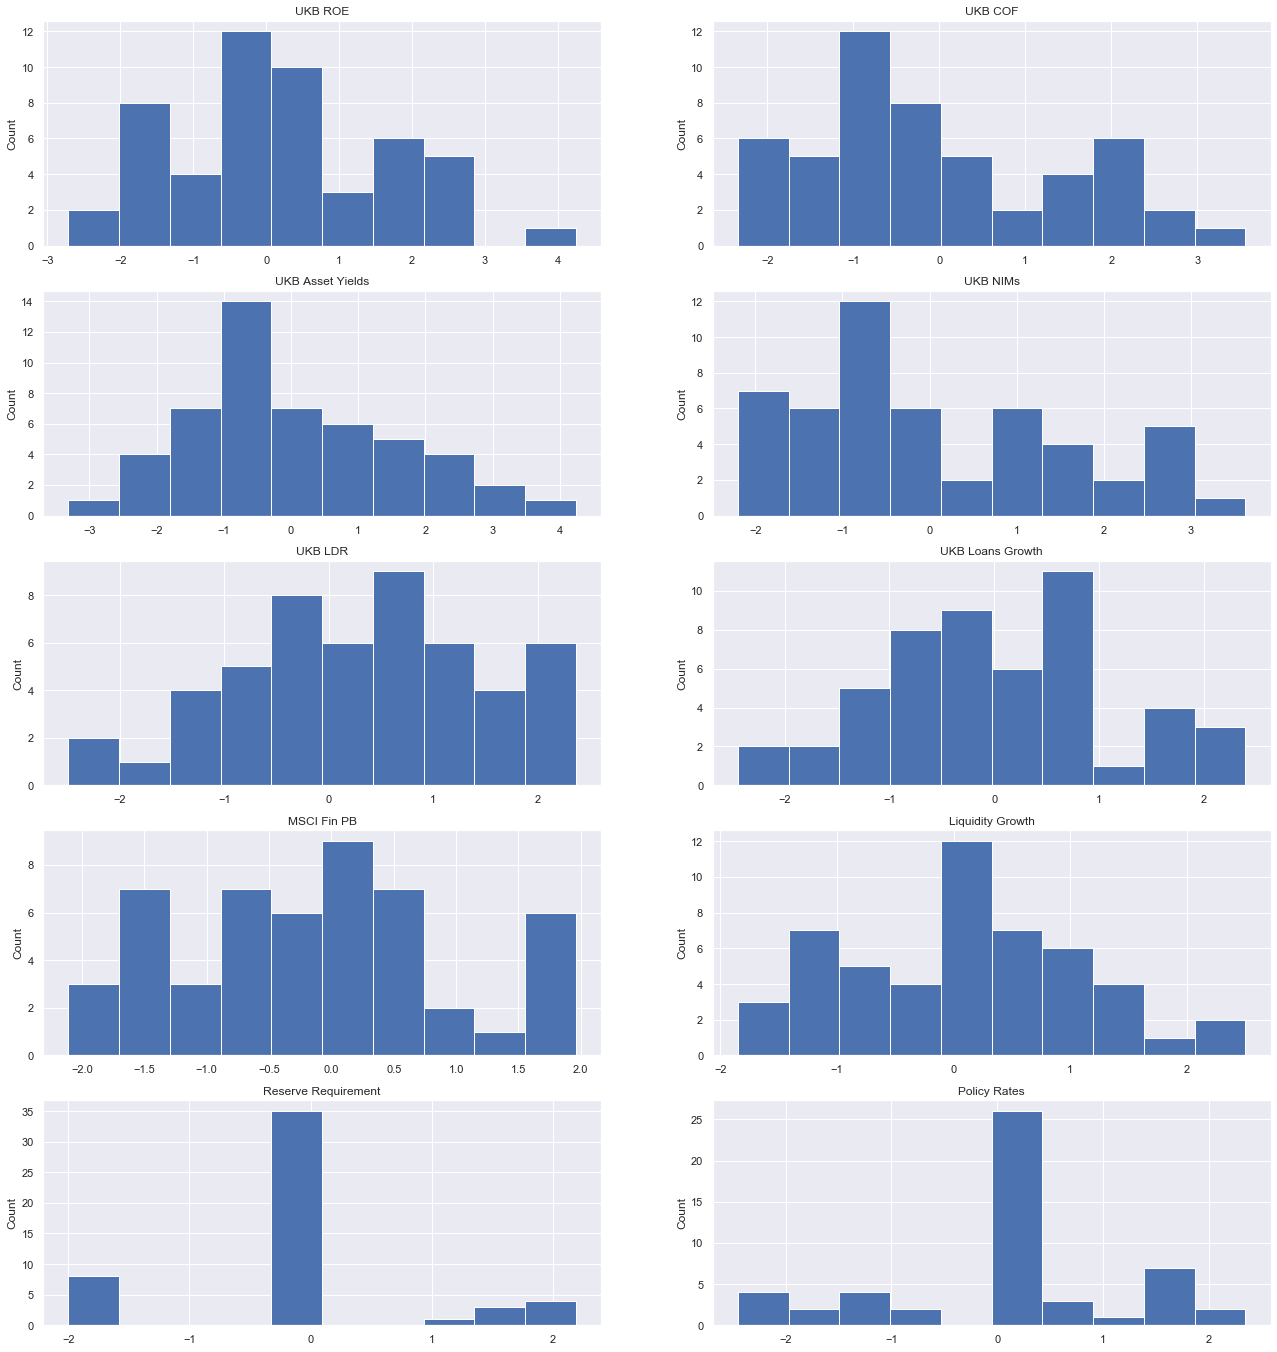

In [11]:
normal_plots(data=sdf)

In [12]:
def granger(s1, s2, lag=4, returns = False):
    ## s1 affected by s2
    granger_df = pd.concat([s1, s2], axis=1).dropna()
    if returns == False:
        grangercausalitytests(granger_df, lag)
    else:
        return grangercausalitytests(granger_df, lag)

print('Testing causality\n')
for col_name, col_cont in sdf.iteritems():
    if col_name != 'fin_pb':
        print('%s -> fin_pb' %col_name)
        granger(df.fin_pb, col_cont)
        print('\n-----------------------------------------------\n')


Testing causality

ucb_roe -> fin_pb

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4464  , p=0.5073  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=0.4749  , p=0.4907  , df=1
likelihood ratio test: chi2=0.4727  , p=0.4917  , df=1
parameter F test:         F=0.4464  , p=0.5073  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4720  , p=0.0398  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=7.7331  , p=0.0209  , df=2
likelihood ratio test: chi2=7.1804  , p=0.0276  , df=2
parameter F test:         F=3.4720  , p=0.0398  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5895  , p=0.0658  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=9.0947  , p=0.0281  , df=3
likelihood ratio test: chi2=8.3285  , p=0.0397  , df=3
parameter F test:         F=2.5895  , p=0.0658  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:

In [13]:
# Select best predictor

#### XXXXXXXXXXXXXXXXXXXX INCOMPLETE
grangercausalitytests(pd.concat([sdf.fin_pb,sdf.ucb_roe], axis=1), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5394  , p=0.4663  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=0.5738  , p=0.4488  , df=1
likelihood ratio test: chi2=0.5705  , p=0.4500  , df=1
parameter F test:         F=0.5394  , p=0.4663  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8206  , p=0.0704  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=6.2823  , p=0.0432  , df=2
likelihood ratio test: chi2=5.9110  , p=0.0521  , df=2
parameter F test:         F=2.8206  , p=0.0704  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8963  , p=0.0465  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=10.1723 , p=0.0172  , df=3
likelihood ratio test: chi2=9.2260  , p=0.0264  , df=3
parameter F test:         F=2.8963  , p=0.0465  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0095  , p=0.1127  , df_d

{1: ({'ssr_ftest': (0.5393765085185753, 0.4663397060369814, 47.0, 1),
   'ssr_chi2test': (0.5738047962963567, 0.4487509405385436, 1),
   'lrtest': (0.5705372521911443, 0.4500455056374839, 1),
   'params_ftest': (0.5393765085185728, 0.4663397060369814, 47.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.8206057587962894, 0.07037634306424151, 44.0, 2),
   'ssr_chi2test': (6.282258280955373, 0.04323395312436461, 2),
   'lrtest': (5.910954877599977, 0.05205380213741903, 2),
   'params_ftest': (2.8206057587962903, 0.07037634306424151, 44.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.8962797574180423, 0.04654917284471962, 41.0, 3),
   'ssr_chi2test': (10.17229963580971, 0.017156898998475015, 3),
   'lrtest': (9.22599740419173, 0.026432248335651984, 3),
   'params_ftest': (2.896279757418037, 0.04654917284471986, 41.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

**Conclusion: XXXXXXXXXXXXXXXXXXXXXX.**

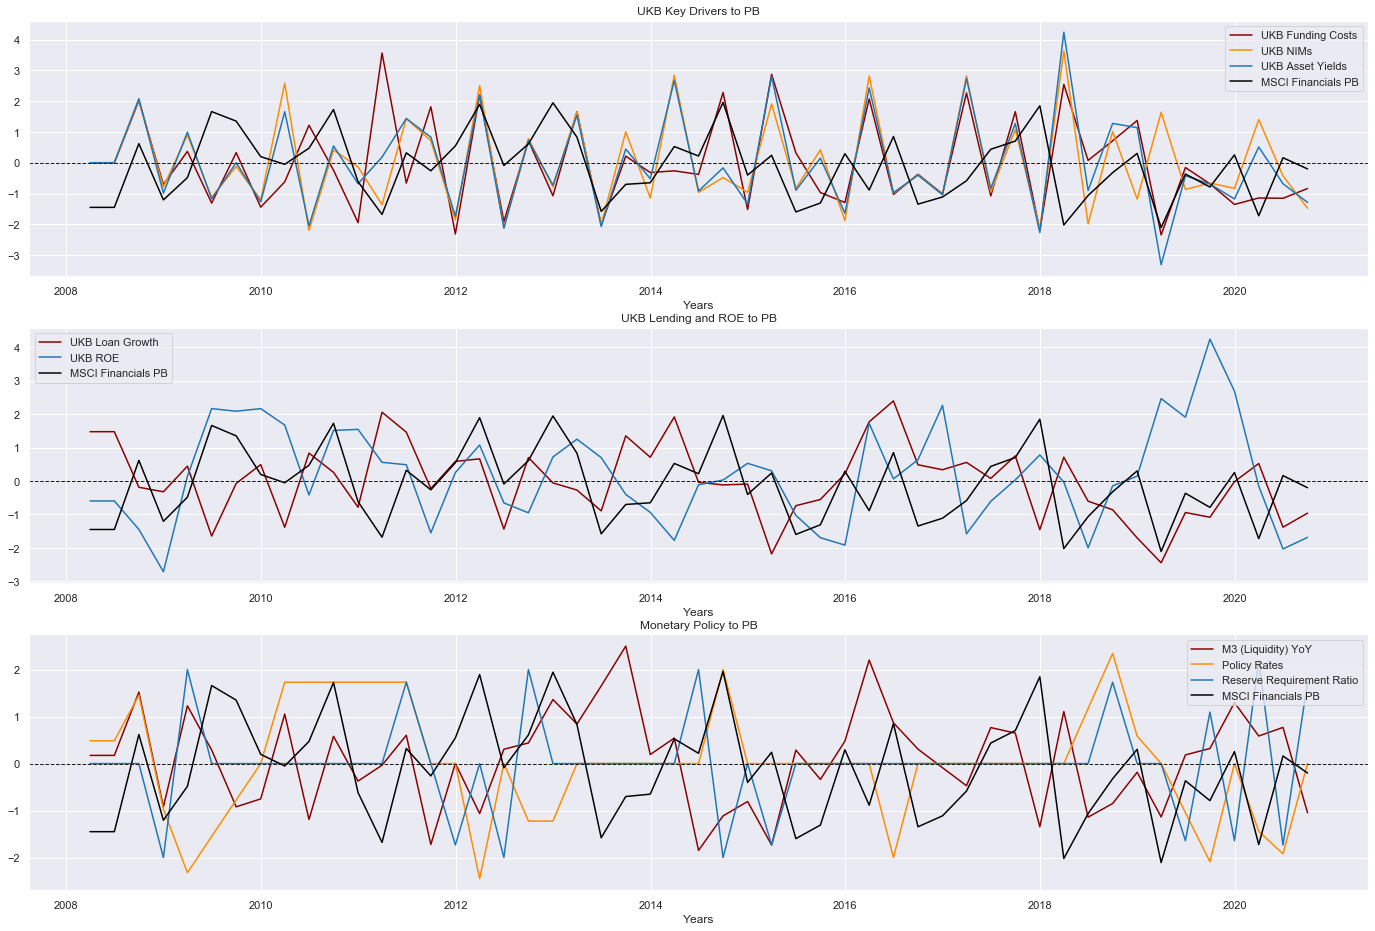

In [14]:
## Plot stationary data
fig = plt.figure(figsize=(24,16))

plt.subplot(3,1,1)
plt.plot(sdf.ucb_cof, color='darkred', label='UKB Funding Costs')
plt.plot(sdf.ucb_nims, color='darkorange', label='UKB NIMs')
plt.plot(sdf.asset_yld, color='tab:blue', label='UKB Asset Yields') 
plt.plot(sdf.fin_pb, color='black', label='MSCI Financials PB')
plt.title('UKB Key Drivers to PB')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.subplot(3,1,2)
plt.plot(sdf.loan_gth, color='darkred', label='UKB Loan Growth')
plt.plot(sdf.ucb_roe, color='tab:blue', label='UKB ROE')
plt.plot(sdf.fin_pb, color='black', label='MSCI Financials PB')
plt.title('UKB Lending and ROE to PB')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.subplot(3, 1, 3)
plt.plot(sdf.m3_yy, color='darkred', label='M3 (Liquidity) YoY')
plt.plot(sdf.policy, color='darkorange', label='Policy Rates')
plt.plot(sdf.rrr, color='tab:blue', label='Reserve Requirement Ratio')
plt.plot(sdf.fin_pb, color='black', label='MSCI Financials PB')
plt.title('Monetary Policy to PB')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

#correction_plots(sdf)

### Fitting VAR Model

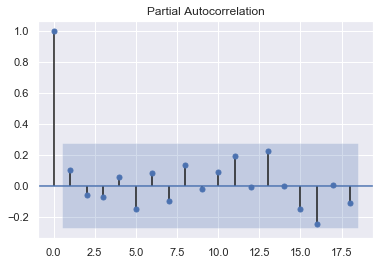

In [15]:
# Plotting partial autocorrelation

plot_pacf(sdf.fin_pb)

plt.show()


In [16]:
# Checking for cross-correlation

def cross_corr(static, dynamic, maxlag = 4):
    maxlag += 1
    for lag in range(1,maxlag):
        static = static.iloc[lag:]
        dynamic = dynamic.iloc[:-lag]
        print('-----------------------------------')
        print('Lag %s' %lag)
        print(pearsonr(static, dynamic))
        
    print('=================================================\n')
    
for col_name, col_cont in sdf.iteritems():
    if col_name != 'fin_pb':
        print('Cross correlation for \'fin_pb\' and \'%s\'' %col_name)
        cross_corr(sdf.fin_pb, col_cont, maxlag=4)

Cross correlation for 'fin_pb' and 'ucb_roe'
-----------------------------------
Lag 1
(-0.09170641345103836, 0.5264739720013655)
-----------------------------------
Lag 2
(0.049556945834307455, 0.7380054150761137)
-----------------------------------
Lag 3
(-0.010045893585897971, 0.9477797799315698)
-----------------------------------
Lag 4
(0.14262330174910426, 0.3737063431565373)

Cross correlation for 'fin_pb' and 'ucb_cof'
-----------------------------------
Lag 1
(0.012413492316853797, 0.9318163856364375)
-----------------------------------
Lag 2
(-0.007274404874237322, 0.9608629733272471)
-----------------------------------
Lag 3
(-0.011596983619149664, 0.9397307759746903)
-----------------------------------
Lag 4
(0.042055027690493366, 0.7940375030431642)

Cross correlation for 'fin_pb' and 'ucb_nims'
-----------------------------------
Lag 1
(-0.0009457131190013942, 0.9947993775185997)
-----------------------------------
Lag 2
(0.2194000259934491, 0.13405460377434378)
---------

In [17]:
### AUTOMATE MODEL SELECTION
def fit_tsmodel(data, model='VAR', lags=4):
    models = ['VAR','SARIMAX']

    if model in models:
        if model == models[0]:
            model = VAR
        elif model == models[1]:
            model == SARIMAX
    else:
        print('Model not supported')
        return None
    
    fmodel = model(data)          
    res = fmodel.fit(maxlags=lags)
    return res

In [19]:
sdf.shape


(51, 10)

In [20]:
### VAR Model
res = fit_tsmodel(sdf,lags=3)
res.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Jan, 2021
Time:                     14:21:12
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    8.18703
Nobs:                     48.0000    HQIC:                  0.669072
Log likelihood:          -277.543    FPE:                   0.234072
AIC:                     -3.89781    Det(Omega_mle):      0.00160506
--------------------------------------------------------------------
Results for equation ucb_roe
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.308217         0.278794            1.106           0.269
L1.ucb_roe           0.294642         0.235609            1.251           0.211
L1.ucb_cof          -0.001248         0.315121           -0.00

In [21]:
r2_score(res.fittedvalues['fin_pb']+res.resid['fin_pb'],
  res.fittedvalues['fin_pb'])

0.800052584461889

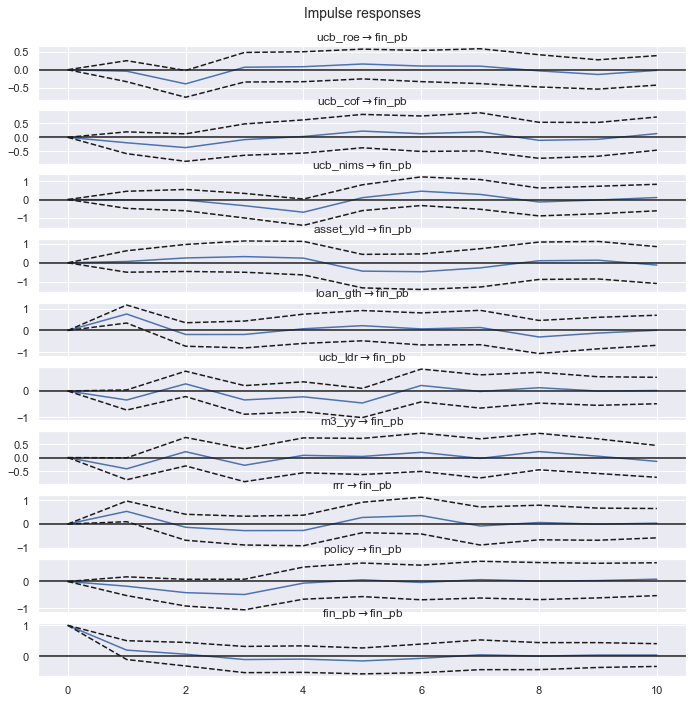

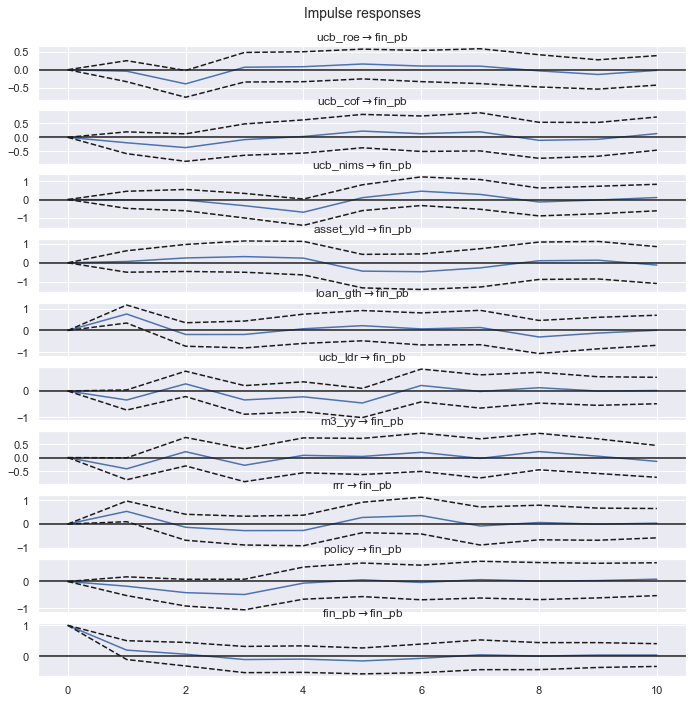

In [22]:
irf = res.irf(10)
irf.plot(orth=False, response='fin_pb')